# Test the implemented NaiveDQN on simple environments 

## Taxi-v3

### Import necessary packages

In [1]:
import logging
from os.path import join
import gym
import numpy as np
import matplotlib.pyplot as plt
from wireless.agents.naive_dqn import NaiveDQNAgent

### `ObservationWrapper` class to handel Taxi-v3 observation space

In [2]:
class BasicWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super(BasicWrapper, self).__init__(env)
        self.n = self.env.observation_space.n

    def observation(self, observation):
        new_obs = np.zeros(self.n)
        new_obs[observation] = 1
        return new_obs

### Initialize variables

In [3]:
n_episodes = 1000
max_steps=1000
logging.getLogger().setLevel(logging.INFO)
env = BasicWrapper(gym.make('Taxi-v3'))

In [4]:
### Initialize the agent

In [5]:
agent = NaiveDQNAgent(
        env,
        epsilon=0.1,
        min_epsilon=0.01,
        gamma=0.95,
    )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Train agent

In [6]:
rewards = agent.train(n_episodes=n_episodes, max_steps=max_steps)

INFO:root:Start to train agent at 2020-07-10 11:23:13.101946
INFO:root:Episode: 1/1000, reward: -299 (mean: -0.299, average mean: -0.299000), Epsilon: 0.099910
INFO:root:Episode: 2/1000, reward: -299 (mean: -0.299, average mean: -0.299000), Epsilon: 0.099820
INFO:root:Episode: 3/1000, reward: -263 (mean: -0.263, average mean: -0.287000), Epsilon: 0.099730
INFO:root:Episode: 4/1000, reward: -236 (mean: -0.236, average mean: -0.274250), Epsilon: 0.099640
INFO:root:Episode: 5/1000, reward: -218 (mean: -0.218, average mean: -0.263000), Epsilon: 0.099550
INFO:root:Episode: 6/1000, reward: -281 (mean: -0.281, average mean: -0.266000), Epsilon: 0.099460
INFO:root:Episode: 7/1000, reward: -236 (mean: -0.236, average mean: -0.261714), Epsilon: 0.099370
INFO:root:Episode: 8/1000, reward: -245 (mean: -0.245, average mean: -0.259625), Epsilon: 0.099280
INFO:root:Episode: 9/1000, reward: -272 (mean: -0.272, average mean: -0.261000), Epsilon: 0.099190
INFO:root:Episode: 10/1000, reward: -254 (mean: 

### Plot the results

Text(0.5, 0, 'Episodes')

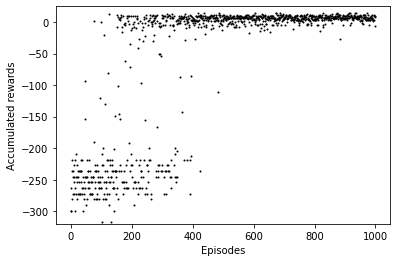

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(rewards, 'ko', label='Rewards', markersize=1)
ax.set_ylim((-320, 25))
ax.set_ylabel('Accumulated rewards')
ax.set_xlabel('Episodes')

### Evaluate the results

In [9]:
stn = 100
rwds = list()
for i in range(stn):
    st, rwd, done = env.reset(), 0, False
    while not done:
        action = agent.act(st)
        st, r, done, _ = env.step(action)
        rwd += r
    rwds.append(rwd)
print(f'Average rewards for {stn} episode: {np.mean(rwds)}')

Average rewards for 100 episode: 7.8
